# 소개
- 영상 처리 또는 영상 인식 소스들을 모아 놓은 라이브러리
- 약 2,500개의 영상 처리 알고리즘이 최적화 되어 있어, 활용에 집중할 수 있도록 함
- 알고리즘에 대한 기초적인 이해가 있으면, 커스터마이징도 가능 함

# 설치

In [4]:
# pip 명령 사용
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# 설치 후 OpenCV 버전 확인
import cv2
cv2.__version__

'4.6.0'

# 이미지 읽기 (cv2.imread)
## OpenCV로 읽기 가능한 이미지 포맷
- Windows bitmaps - *.bmp, *.dib
- JPEG files - *.jpeg, *.jpg, *.jpe
- JPEG 2000 files - *.jp2
- Portable Network Graphics - *.png
- WebP - *.webp
- Portable image format - *.pbm, *.pgm, *.ppm *.pxm, *.pnm
- Sun rasters - *.sr, *.ras
- TIFF files - *.tiff, *.tif
- OpenEXR Image files - *.exr
- Radiance HDR - *.hdr, *.pic

## flags : 이미지 파일을 읽을 때의 옵션
- -1 : 원본 (Unchanged) = cv2.IMREAD_UNCHANGED
- 0  : 단일 채널 (Grayscale) = cv2.IMREAD_GRAYSCALE
- 1  : 3 채널 (BGR color) = cv2.IMREAD_COLOR
- 2  : 16-bit는 16-bit로, 32-bit는 32-bit로, 그 외에는 8-bit
- 16 : 단일 채널 (Grayscale) & 이미지 크기 1/2으로 축소
- 17 : 3 채널 (BGR color) & 이미지 크기 1/2으로 축소
- 32 : 단일 채널 (Grayscale) & 이미지 크기 1/4으로 축소
- 33 : 3 채널 (BGR color) & 이미지 크기 1/4으로 축소
- 64 : 단일 채널 (Grayscale) & 이미지 크기 1/8으로 축소
- 65 : 3 채널 (BGR color) & 이미지 크기 1/8으로 축소

In [34]:
img_dir = 'D:/leftImg8bit_trainvaltest/leftImg8bit/train/hamburg'
fname = 'hamburg_000000_000042_leftImg8bit.png'

import os
img_gray         = cv2.imread(os.path.join(img_dir, fname), flags = 0)
img_color        = cv2.imread(os.path.join(img_dir, fname), flags = 1)
img_color_reduce = cv2.imread(os.path.join(img_dir, fname), flags = 17)

## imread 결과
- 이미지 높이(h), 너비(w), 채널(c) 순서로 배열 출력

In [36]:
print(0, img_gray.shape) # Gray
print(1, img_color.shape) # BGR
print(17, img_color_reduce.shape) # BGR, Half size

0 (1024, 2048)
1 (1024, 2048, 3)
17 (512, 1024, 3)


## 변환 : BGR -> RGB

In [37]:
# BRG -> RGB로 변경
img_color        = cv2.cvtColor(img_color       , cv2.COLOR_BGR2RGB)
img_color_reduce = cv2.cvtColor(img_color_reduce, cv2.COLOR_BGR2RGB)

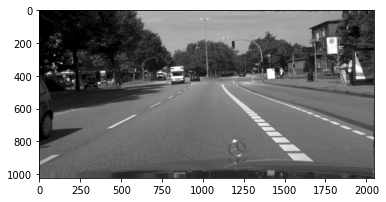

In [38]:
# Grayscale
plt.imshow(img_gray, cmap = 'gray'); plt.show()

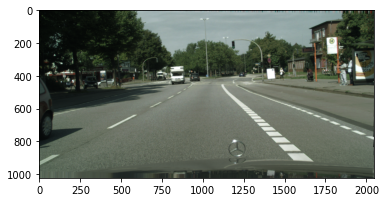

In [39]:
# RGB
plt.imshow(img_color); plt.show()

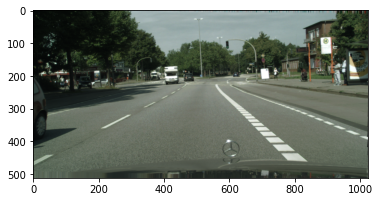

In [40]:
# RGB & Half size
plt.imshow(img_color_reduce); plt.show()

# 두 개의 이미지 더하기 (cv2.add, cv2.addWeighted)

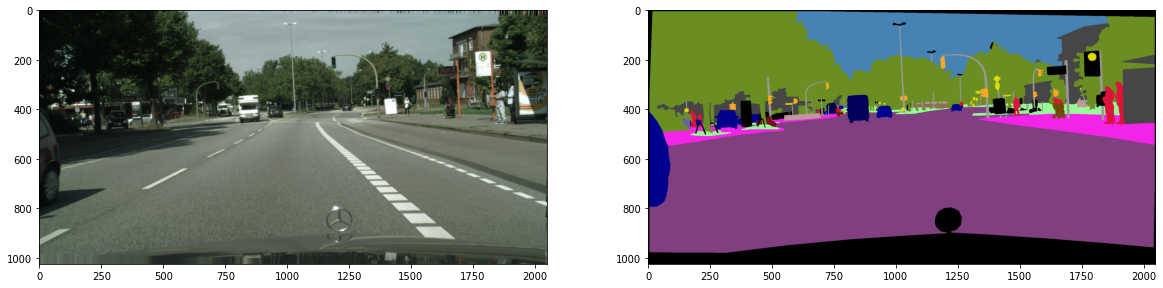

In [55]:
# 이미지 읽기
base_img = cv2.imread(
    "D:/leftImg8bit_trainvaltest/leftImg8bit/train/hamburg/hamburg_000000_000042_leftImg8bit.png",
    flags = 1
    )
seg_img = cv2.imread(
    "D:/gtFine_trainvaltest/gtFine/train/hamburg/hamburg_000000_000042_gtFine_color.png",
    flags = 1
)

# 이미지 변환
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
seg_img  = cv2.cvtColor( seg_img, cv2.COLOR_BGR2RGB)

# 시각화
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, seg_img]): sub.imshow(img)
plt.show()

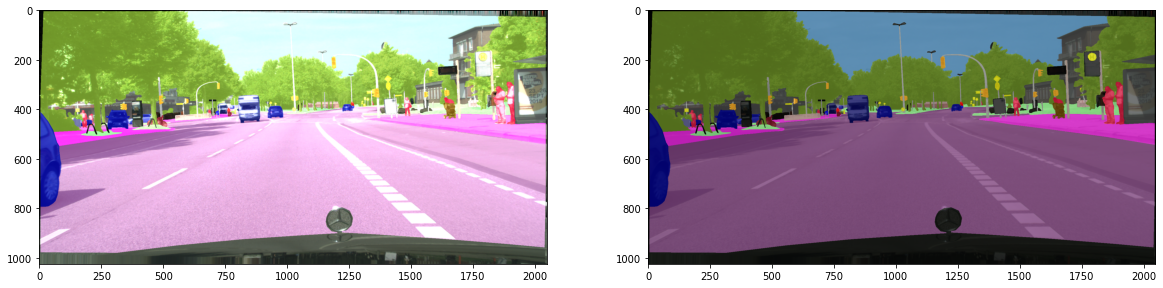

In [57]:
# 이미지 더하기
added_img    = cv2.add(base_img, seg_img)
weighted_img = cv2.addWeighted(base_img, .25, seg_img, .75, gamma = 0) # gamma : 가중합 결과에 추가적으로 더하는 값

# 시각화
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [added_img, weighted_img]): sub.imshow(img)
plt.show()